<a href="https://colab.research.google.com/github/Sripriya07/Take_Home_Task/blob/master/TakeHomeTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Take Home Task :

Importing all the necessary Libraries 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline


Loading the data :

In [0]:
df=pd.read_csv('TakeHome_task_data.csv')

In [26]:
df.shape

(2000, 2)

In [27]:
df.keys()

Index(['data', 'label'], dtype='object')

Renaming column data to data_dict to remove ambiguity as one of the keys of dictionary entry in data column also named a s data

In [0]:
df.columns=['data_dict','label']

In [29]:
df['data_dict'].shape

(2000,)

In [13]:
df['data_dict'].describe()

count                                                  2000
unique                                                 2000
top       {'id': 'DD7QWE', 'data': 'hi', 'message_order'...
freq                                                      1
Name: data_dict, dtype: object

In [30]:
df['data_dict'].dtype #to know the datatype of column

dtype('O')

# Data Preprocessing

In [31]:
df['data_dict'][0]

"{'id': 'KG0OUA', 'data': 'Good morning', 'message_order': 2, 'comments': ['']}"

As we can see ,the entries of each row are strings which contains a dictionary.So,removing the '' '' punctuation from all the rows of the column data_dict to make it into a dictionary.

In [0]:
import ast
for i in range(2000):
     df.data_dict[i]=ast.literal_eval(df.data_dict[i])

In [33]:
df.data_dict[1999]

{'comments': [''], 'data': 'No bike', 'id': 'UGBYIK', 'message_order': 0}

In [34]:
df.data_dict[0]

{'comments': [''], 'data': 'Good morning', 'id': 'KG0OUA', 'message_order': 2}

Now,all the row entries are converted into dictionary in the column data_dict.Create a new Dataframe and load all the dictionary key value pairs by splitting them into columns.

In [35]:
df_1=pd.DataFrame()
for i in range(2000):
    df_1=df_1.append(pd.DataFrame(df.data_dict[i]))
    
    
df_1.shape

(2000, 4)

In [36]:
df_1.tail()

,id,data,message_order,comments
0,2RG46Y,OK by,4,
0,HCTZ3F,LL,5,
0,ITXTOW,Ok sir,2,
0,IOKVYD,Hello,4,
0,UGBYIK,No bike,0,


In [37]:
df=pd.DataFrame(df)
df.tail()

,data_dict,label
1995,"{'id': '2RG46Y', 'data': 'OK by', 'message_ord...",dontMeetRequirements
1996,"{'id': 'HCTZ3F', 'data': 'LL', 'message_order'...",notInterested
1997,"{'id': 'ITXTOW', 'data': 'Ok sir', 'message_or...",whoAreYou
1998,"{'id': 'IOKVYD', 'data': 'Hello', 'message_ord...",greeting
1999,"{'id': 'UGBYIK', 'data': 'No bike', 'message_o...",greeting


Now,Concatenating two Dataframes into a single Dataframe by using the concat()

In [39]:
df.reset_index(drop=True,inplace=True)
df_1.reset_index(drop=True,inplace=True)
df_3=pd.concat([df,df_1],axis=1)
df_3.head()

,data_dict,label,id,data,message_order,comments
0,"{'id': 'KG0OUA', 'data': 'Good morning', 'mess...",location,KG0OUA,Good morning,2,
1,"{'id': 'L9DC9H', 'data': 'Location', 'message_...",whoAreYou,L9DC9H,Location,5,
2,"{'id': 'ZQR6R5', 'data': 'hi', 'message_order'...",whoAreYou,ZQR6R5,hi,5,
3,"{'id': 'RH0M4E', 'data': 'Hi', 'message_order'...",greeting,RH0M4E,Hi,4,
4,"{'id': 'WLVX8I', 'data': 'Hello', 'message_ord...",greeting,WLVX8I,Hello,1,


Dropping unncessary columns like data_dict,as we have already split the items in it and also comments columns as it has no entries

In [0]:
df_3.drop(['data_dict','comments'],axis=1,inplace=True)

In [42]:
df_3.shape # printing the shape 

(2000, 4)

Printing the first 5 entries if the resulted Dataframe

In [43]:
df_3.head()

,label,id,data,message_order
0,location,KG0OUA,Good morning,2
1,whoAreYou,L9DC9H,Location,5
2,whoAreYou,ZQR6R5,hi,5
3,greeting,RH0M4E,Hi,4
4,greeting,WLVX8I,Hello,1


Cleaning the Data :

Removing all the punctuations and symbols present in data_dict column.

In [0]:
df_3['data']=df_3['data'].str.replace('[^\w\s]','')


In [47]:
df_3['data'].value_counts()

Ok                                                              245
Hi                                                              241
Hello                                                            74
Hii                                                              73
hi                                                               36
K                                                                36
Hiii                                                             32
No                                                               28
Okay                                                             23
Kk                                                               21
Good morning                                                     18
Hai                                                              17
Hlo                                                              13
ok                                                               13
Where                                           

 # Data Visualization

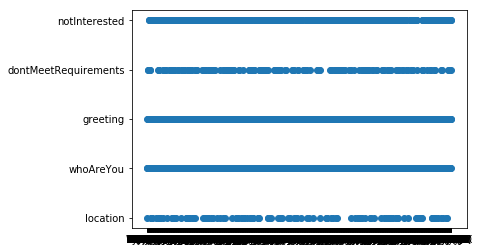

In [54]:
plt.figure(8)
plt.scatter(df_3['data'],df_3['label'])
plt.show()

Now,Converting all the letters in the data columns into lowercase as it reduces the duplicates of words.

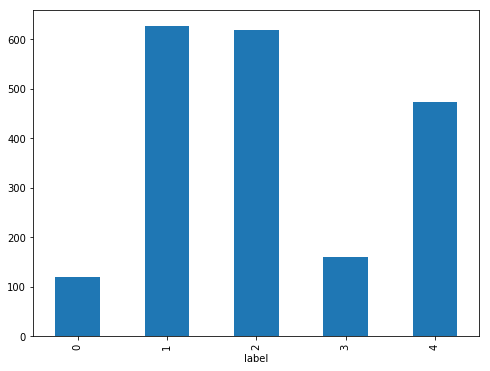

In [78]:

fig = plt.figure(figsize=(8,6))
df_3.groupby('label').data.count().plot.bar(ylim=0)
plt.show()

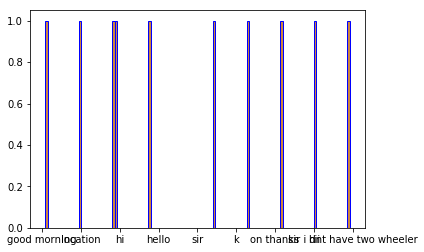

In [257]:
plt.hist(df_3['data'].iloc[:10],
        facecolor='peru',
        edgecolor='blue',
        bins=10)
plt.show()

In [0]:
df_3['data']=df_3['data'].apply(lambda x:" ".join(x.lower() for x in x.split()))

Rearranging the columns :

In [68]:
cols=df_3.columns.to_list()
cols

['label', 'id', 'data', 'message_order']

In [0]:
cols=cols[1:]+cols[:1]

In [71]:
cols

['id', 'data', 'message_order', 'label']

In [0]:
df_3=df_3[cols]

In [73]:
df_3.head()

,id,data,message_order,label
0,KG0OUA,good morning,2,location
1,L9DC9H,location,5,whoAreYou
2,ZQR6R5,hi,5,whoAreYou
3,RH0M4E,hi,4,greeting
4,WLVX8I,hello,1,greeting


In [75]:
df_3['label'].unique()

array(['location', 'whoAreYou', 'greeting', 'dontMeetRequirements',
       'notInterested'], dtype=object)

As,there are 5 unique labels in the label,mapping each of the label to a numeric value using map().Hence,this would become a 5 categorical classification problem.

In [0]:
output_mapping={'location':0,'whoAreYou':1,'greeting':2,'dontMeetRequirements':3,'notInterested':4}

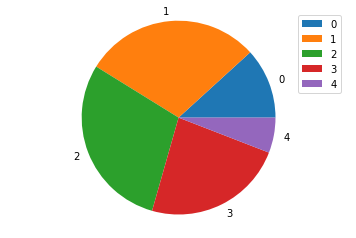

In [270]:
plt.pie(df_3['message_order'].iloc[:5],
       labels=df_3['label'].unique())
plt.axis('equal')
plt.legend()
plt.show()

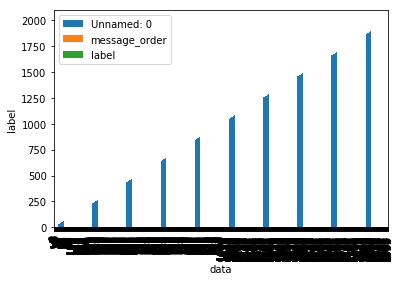

In [271]:
df.plot.bar()

plt.bar(df['data'].iloc[:5],df['label'].unique())
plt.xlabel("data")
plt.ylabel("label")

plt.legend()
plt.show()

In [0]:
df_3['label']=df_3['label'].map(output_mapping)

In [79]:
df_3.head()

,id,data,message_order,label
0,KG0OUA,good morning,2,0
1,L9DC9H,location,5,1
2,ZQR6R5,hi,5,1
3,RH0M4E,hi,4,2
4,WLVX8I,hello,1,2


Now,our data is preprocessed and ready for training.Lets try with different algorithms and find out which one works well.So,initially importing necessary libraries

# Model Training using Sklearn

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

pipeline of feature engineering and model 


In [0]:
model = Pipeline([('vectorizer', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced")))])
#the class_weight="balanced" option tries to remove the biasedness of model towards majority sample

In [0]:
#paramater selection
from sklearn.model_selection import GridSearchCV
parameters = {'vectorizer__ngram_range': [(1, 1), (1, 2),(2,2),(2,3),(3,3)],
               'tfidf__use_idf': (True, False)}


In [0]:
gs_clf_svm = GridSearchCV(model, parameters, n_jobs=-1)

In [109]:
X = df_3['data']
y = df_3['label']
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)
print(X_train.shape,X_test.shape)

(1540, 821) (460, 821)


In [110]:
X = df_3['data']
y = df_3['label']

gs_clf_svm = gs_clf_svm.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



In [111]:
print(gs_clf_svm.best_score_*100)
print(gs_clf_svm.best_params_)

30.099999999999998
{'tfidf__use_idf': False, 'vectorizer__ngram_range': (3, 3)}


In [0]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_3['data'], df_3['label'],test_size=0.33)


In [175]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

print(train_y.shape,valid_y.shape)

(1340,) (660,)


# Feature Engineering :
The next step is the feature engineering step. In this step, raw text data will be transformed into feature vectors and new features will be created using the existing dataset. We will implement the following different ideas in order to obtain relevant features from our dataset.

1)Count Vectors as features

2) TF-IDF Vectors as features

       -Word level
       
       -N-Gram level
       
       -Character level
3) Word Embeddings as features

4) Text / NLP based features

5) Topic Models as features

**Count Vectors as features:**

Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

In [176]:
# create a count vectorizer object 

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df_3['data'])

# transform the training and validation data using count vectorizer object

xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

xtrain_count

<1340x839 sparse matrix of type '<class 'numpy.int64'>'
	with 3074 stored elements in Compressed Sparse Row format>

**TF-IDF Vectors as features :**

TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)

IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)

a. **Word Level TF-IDF**  : Matrix representing tf-idf scores of every term in different documents

b. **N-gram Level TF-IDF** : N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams

c. **Character Level TF-IDF** : Matrix representing tf-idf scores of character level n-grams in the corpus

a) **word level tf-idf** :

In [0]:

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df_3['data'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)


b) **ngram level tf-idf** :

In [0]:
 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,50), max_features=5000)
tfidf_vect_ngram.fit(df_3['data'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

c) **characters level tf-idf** :

In [0]:

tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(1,50), max_features=5000)
tfidf_vect_ngram_chars.fit(df_3['data'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

**Word Embeddings :**

A word embedding is a form of representing words and documents using a dense vector representation. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. Word embeddings can be trained using the input corpus itself or can be generated using pre-trained word embeddings such as Glove, FastText, and Word2Vec. Any one of them can be downloaded and used as transfer learning.

File can be downloaded as follows :

In [127]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2019-07-30 05:10:45--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:16a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  41.8MB/s    in 17s     

2019-07-30 05:11:02 (37.3 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



Now,Unzip the zip file

In [128]:
!unzip wiki-news-300d-1M.vec.zip

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


**load the pre-trained word-embedding vectors**

In [0]:
 
embeddings_index = {}
for i, line in enumerate(open('wiki-news-300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')


create a tokenizer :

In [0]:

token = text.Tokenizer()
token.fit_on_texts(df_3['data'])
word_index = token.word_index

Now,convert text to sequence of tokens and pad them to ensure equal length vectors 

In [0]:

train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

create token-embedding mapping

In [0]:

embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Now,Let's train a LDA Model.LDA is an iterative model which starts from a fixed number of topics. Each topic is represented as a distribution over words, and each document is then represented as a distribution over topics. Although the tokens themselves are meaningless, the probability distributions over words provided by the topics provide a sense of the different ideas contained in the documents

In [0]:

lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [0]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

# Model Building
The final step in the text classification framework is to train a classifier using the features created in the previous step. There are many different choices of machine learning models which can be used to train a final model. I have  implemented the  following different classifiers :

Naive Bayes Classifier

Linear Classifier

Support Vector Machine

Bagging Models

Boosting Models

Bidirectional LSTM

In [0]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

# Naive Bayes

**Naive Bayes on Count Vectors :**

In [187]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy)


NB, Count Vectors:  0.31666666666666665


**Naive Bayes on Word Level TF IDF Vectors** :

In [188]:

accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

NB, WordLevel TF-IDF:  0.3242424242424242


**Naive Bayes on Ngram Level TF IDF Vectors** :

In [189]:

accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print( "NB, N-Gram Vectors: ", accuracy)

NB, N-Gram Vectors:  0.3242424242424242


**Naive Bayes on Character Level TF IDF Vectors**


In [190]:
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print( "NB, CharLevel Vectors: ", accuracy)

NB, CharLevel Vectors:  0.32575757575757575


# Linear Classifier


**Linear Classifier on Count Vectors :**

In [191]:

accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print( "LR, Count Vectors: ", accuracy)

LR, Count Vectors:  0.3181818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



**Linear Classifier on Word Level TF IDF Vectors :**

In [193]:
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy*100)

LR, WordLevel TF-IDF:  32.57575757575758


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



**Linear Classifier on Ngram Level TF IDF Vectors** :

In [194]:

accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)

LR, N-Gram Vectors:  0.3181818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



**Linear Classifier on Character Level TF IDF Vectors** :

In [195]:
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)

LR, CharLevel Vectors:  0.3106060606060606


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



# SVM

**SVM on Ngram Level TF IDF Vectors** :

In [196]:

accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, N-Gram Vectors: ", accuracy)

SVM, N-Gram Vectors:  0.31666666666666665


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



# Random Forest

**RF on Count Vectors** :


In [197]:
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy)

RF, Count Vectors:  0.296969696969697


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



**RF on Word Level TF IDF Vectors** :

In [198]:

accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy)

RF, WordLevel TF-IDF:  0.28939393939393937


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



# Extreme Gradient Boosting :

**Extereme Gradient Boosting on Count Vectors** :

In [199]:

accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print ("Xgb, Count Vectors: ", accuracy)


Xgb, Count Vectors:  0.3151515151515151


**Extereme Gradient Boosting on Word Level TF IDF Vectors** :

In [200]:

accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy)

Xgb, WordLevel TF-IDF:  0.31666666666666665


**Extereme Gradient Boosting on Character Level TF IDF Vectors** :

In [201]:
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print ("Xgb, CharLevel Vectors: ", accuracy)

Xgb, CharLevel Vectors:  0.31212121212121213


# Bi-Directional LSTM Neural Network :

Initially, Import all the necessary libraries to build this model.

In [0]:
import pickle
from collections import defaultdict
import re
from bs4 import BeautifulSoup
import sys
import os
os.environ['KERAS_BACKEND']='tensorflow'
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers
%matplotlib inline

In [0]:
MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [239]:
# reading data
df = pd.read_csv('output_file.csv') # output_file.csv is the file which we saved after text preprocessing
df = df.dropna()
df = df.reset_index(drop=True)
print('Shape of dataset ',df.shape)
print(df.columns)
print('No. of unique classes',len(set(df['label'])))

Shape of dataset  (1999, 5)
Index(['Unnamed: 0', 'id', 'data', 'message_order', 'label'], dtype='object')
No. of unique classes 5


In [0]:
macronum=sorted(set(df['label']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def fun(i):
    return macro_to_id[i]

df['label']=df['label'].apply(fun)

In [0]:
texts1 = []
labels1 = []


for idx in range(0,df.data.shape[0]):
    text1 = BeautifulSoup(df.data[idx])
    texts1.append(str(text1.get_text().encode()))

for idx in df['label']:
    labels1.append(idx)

In [242]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts1)
sequences = tokenizer.texts_to_sequences(texts1)

word_index = tokenizer.word_index

print('Number of Unique Tokens',len(word_index))

Number of Unique Tokens 1143


Using pretrained word embedding model.It can be downloaded as below.

In [243]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-07-30 06:20:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-07-30 06:20:49--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-07-30 06:20:49--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [244]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


Padding and splitting the data into x_train,y_train and x_test,y_test

In [245]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


labels1 = to_categorical(np.asarray(labels1))
print('Shape of Data Tensor:', data.shape)
print('Shape of Label Tensor:', labels1.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels1 = labels1[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels1[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels1[-nb_validation_samples:]

Shape of Data Tensor: (1999, 1000)
Shape of Label Tensor: (1999, 5)


In [246]:
embeddings_index = {}
f = open('glove.6B.100d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove 6B 100d.' % len(embeddings_index))

Total 400000 word vectors in Glove 6B 100d.


In [0]:
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

In [249]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
preds = Dense(len(macronum), activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Bidirectional LSTM")
model.summary()

Bidirectional LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 1000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 100)         114400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 1005      
Total params: 276,205
Trainable params: 276,205
Non-trainable params: 0
_________________________________________________________________


In [0]:
cp=ModelCheckpoint('model_rnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)

In [253]:
history=model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=5, batch_size=2,callbacks=[cp])

Train on 1600 samples, validate on 399 samples
Epoch 1/5
1600/1600 [==============================] - 921s 575ms/step - loss: 1.2669 - acc: 0.4600 - val_loss: 1.6931 - val_acc: 0.2932

Epoch 00001: val_acc did not improve from 0.37845
Epoch 2/5
 546/1600 [=========>....................] - ETA: 9:47 - loss: 1.2792 - acc: 0.4451

KeyboardInterrupt: ignored